In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_loan_data = pd.read_csv("/content/drive/MyDrive/loan_data_2007_2014.csv", index_col=0)

<ipython-input-2-aea815471b68>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan_data = pd.read_csv("/content/drive/MyDrive/loan_data_2007_2014.csv", index_col=0)


In [3]:
df_loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [4]:
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [5]:
print(df_loan_data.nunique())

id                  466285
member_id           466285
loan_amnt             1352
funded_amnt           1354
funded_amnt_inv       9854
                     ...  
all_util                 0
total_rev_hi_lim     14612
inq_fi                   0
total_cu_tl              0
inq_last_12m             0
Length: 74, dtype: int64


In [6]:
df_loan_data.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 74, dtype: int64

In [7]:
#drop column with 100% null
df_loan_data.drop(['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
                   'total_bal_il', 'il_util', 'open_rv_12m','open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
                   axis=1, inplace=True)
df_loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


In [8]:
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [9]:
# percentage of missing values per feature
print((df_loan_data.isnull().sum() * 100 / df_loan_data.shape[0]).sort_values(ascending=False))

mths_since_last_record         86.566585
mths_since_last_major_derog    78.773926
desc                           72.981546
mths_since_last_delinq         53.690554
next_pymnt_d                   48.728567
tot_cur_bal                    15.071469
tot_coll_amt                   15.071469
total_rev_hi_lim               15.071469
emp_title                       5.916553
emp_length                      4.505399
last_pymnt_d                    0.080637
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
last_credit_pull_d              0.009007
inq_last_6mths                  0.006219
open_acc                        0.006219
earliest_cr_line                0.006219
delinq_2yrs                     0.006219
acc_now_delinq                  0.006219
total_acc                       0.006219
pub_rec                         0.006219
title                           0.004289
annual_inc                      0.000858
grade                           0.000000
recoveries      

In [10]:
#drop column with up to 80% null
df_loan_data.drop(['mths_since_last_record'], axis=1, inplace=True)
df_loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


In [11]:
# number of unique observations per column
df_loan_data.nunique().sort_values()

application_type                    1
policy_code                         1
pymnt_plan                          2
term                                2
initial_list_status                 2
verification_status                 3
acc_now_delinq                      6
home_ownership                      6
grade                               7
collections_12_mths_ex_med          9
loan_status                         9
emp_length                         11
purpose                            14
delinq_2yrs                        24
pub_rec                            26
inq_last_6mths                     28
sub_grade                          35
addr_state                         50
open_acc                           62
issue_d                            91
last_pymnt_d                       98
next_pymnt_d                      100
last_credit_pull_d                103
total_acc                         112
mths_since_last_delinq            145
mths_since_last_major_derog       162
int_rate    

In [12]:
#drop column with only 1 value
df_loan_data.drop(['policy_code', 'application_type'], axis=1, inplace=True)
df_loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,0.0,0.0,294998.0,29900.0
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,Dec-14,17.50,NaN,Jan-16,0.0,NaN,0.0,0.0,221830.0,39400.0
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,0.0,0.0,73598.0,13100.0
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,0.0,0.0,591610.0,53100.0


In [13]:
#drop column that won't be useful and containing all different values
df_loan_data.drop(['id', 'member_id', 'tot_cur_bal', 'revol_bal',
                   'total_rev_hi_lim', 'tot_coll_amt', 'dti'
                   ,'mths_since_last_major_derog', 'total_acc',
                   'last_credit_pull_d', 'next_pymnt_d', 'last_pymnt_d',
                   'open_acc', 'pub_rec', 'delinq_2yrs', 'loan_status',
                   'collections_12_mths_ex_med', 'acc_now_delinq',
                   'url', 'desc', 'title', 'zip_code', 'addr_state', 'emp_title'
                   , 'emp_length'
                   ], axis=1, inplace=True)
df_loan_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,...,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,...,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,...,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,...,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,RENT,80000.0,...,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,C,C2,MORTGAGE,110000.0,...,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64
466281,22000,22000,22000.0,60 months,19.97,582.50,D,D5,MORTGAGE,78000.0,...,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50
466282,20700,20700,20700.0,60 months,16.99,514.34,D,D1,MORTGAGE,46000.0,...,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34
466283,2000,2000,2000.0,36 months,7.90,62.59,A,A4,OWN,83000.0,...,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,1500.68


In [14]:
df_loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt,466285.0,14291.801044,8274.371300,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt_inv,466285.0,14222.329888,8297.637788,0.00,8000.000000,12000.000000,19950.00000,3.500000e+04
int_rate,466285.0,13.829236,4.357587,5.42,10.990000,13.660000,16.49000,2.606000e+01
installment,466285.0,432.061201,243.485550,15.67,256.690000,379.890000,566.58000,1.409990e+03
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.000000,63000.000000,88960.00000,7.500000e+06
inq_last_6mths,466256.0,0.804745,1.091598,0.00,0.000000,0.000000,1.00000,3.300000e+01
mths_since_last_delinq,215934.0,34.104430,21.778487,0.00,16.000000,31.000000,49.00000,1.880000e+02
revol_util,465945.0,56.176947,23.732628,0.00,39.200000,57.600000,74.70000,8.923000e+02
out_prncp,466285.0,4410.062342,6355.078769,0.00,0.000000,441.470000,7341.65000,3.216038e+04


In [15]:
df_loan_data.duplicated(subset = None, keep = 'first')

0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Length: 466285, dtype: bool

In [16]:
df_loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [17]:
df_loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [18]:
df_loan_data['issue_d'] = pd.to_datetime(df_loan_data['issue_d'], format='%b-%y')
df_loan_data['issue_d'].tail()

466280   2014-01-01
466281   2014-01-01
466282   2014-01-01
466283   2014-01-01
466284   2014-01-01
Name: issue_d, dtype: datetime64[ns]

In [19]:
df_loan_data['earliest_cr_line'] = pd.to_datetime(df_loan_data['earliest_cr_line'], format='%b-%y')
df_loan_data['earliest_cr_line'].tail()

466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [20]:
def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) /
							np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(
		lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)

In [21]:
date_columns(df_loan_data, 'issue_d')
date_columns(df_loan_data, 'earliest_cr_line')

In [22]:
print(df_loan_data['mths_since_issue_d'].describe())
print(df_loan_data['mths_since_earliest_cr_line'].describe())

count    466285.000000
mean         83.255187
std          14.340154
min          68.000000
25%          73.000000
50%          79.000000
75%          89.000000
max         158.000000
Name: mths_since_issue_d, dtype: float64
count    466256.000000
mean        274.385374
std          86.460310
min         105.000000
25%         216.000000
50%         258.000000
75%         317.000000
max         619.000000
Name: mths_since_earliest_cr_line, dtype: float64


In [23]:
df_loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [24]:
# function to remove 'months' string from the 'term' column and convert it to numeric
def loan_term_converter(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))

loan_term_converter(df_loan_data, 'term')

In [25]:
# data frame containing numerical features
df_loan_numerical = df_loan_data[['last_pymnt_amnt','collection_recovery_fee', 'recoveries', 'total_rec_late_fee', 'total_rec_int',
                                 'total_rec_prncp', 'total_pymnt_inv', 'total_pymnt', 'out_prncp_inv', 'out_prncp','revol_util', 'mths_since_last_delinq',
                                  'inq_last_6mths', 'annual_inc', 'installment', 'int_rate', 'funded_amnt_inv', 'funded_amnt', 'loan_amnt','mths_since_issue_d',
                                  'mths_since_earliest_cr_line','term']]

<ipython-input-26-855745b6e5b4>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_loan_numerical[i], bins=15,kde=False, ax=ax[r][c])


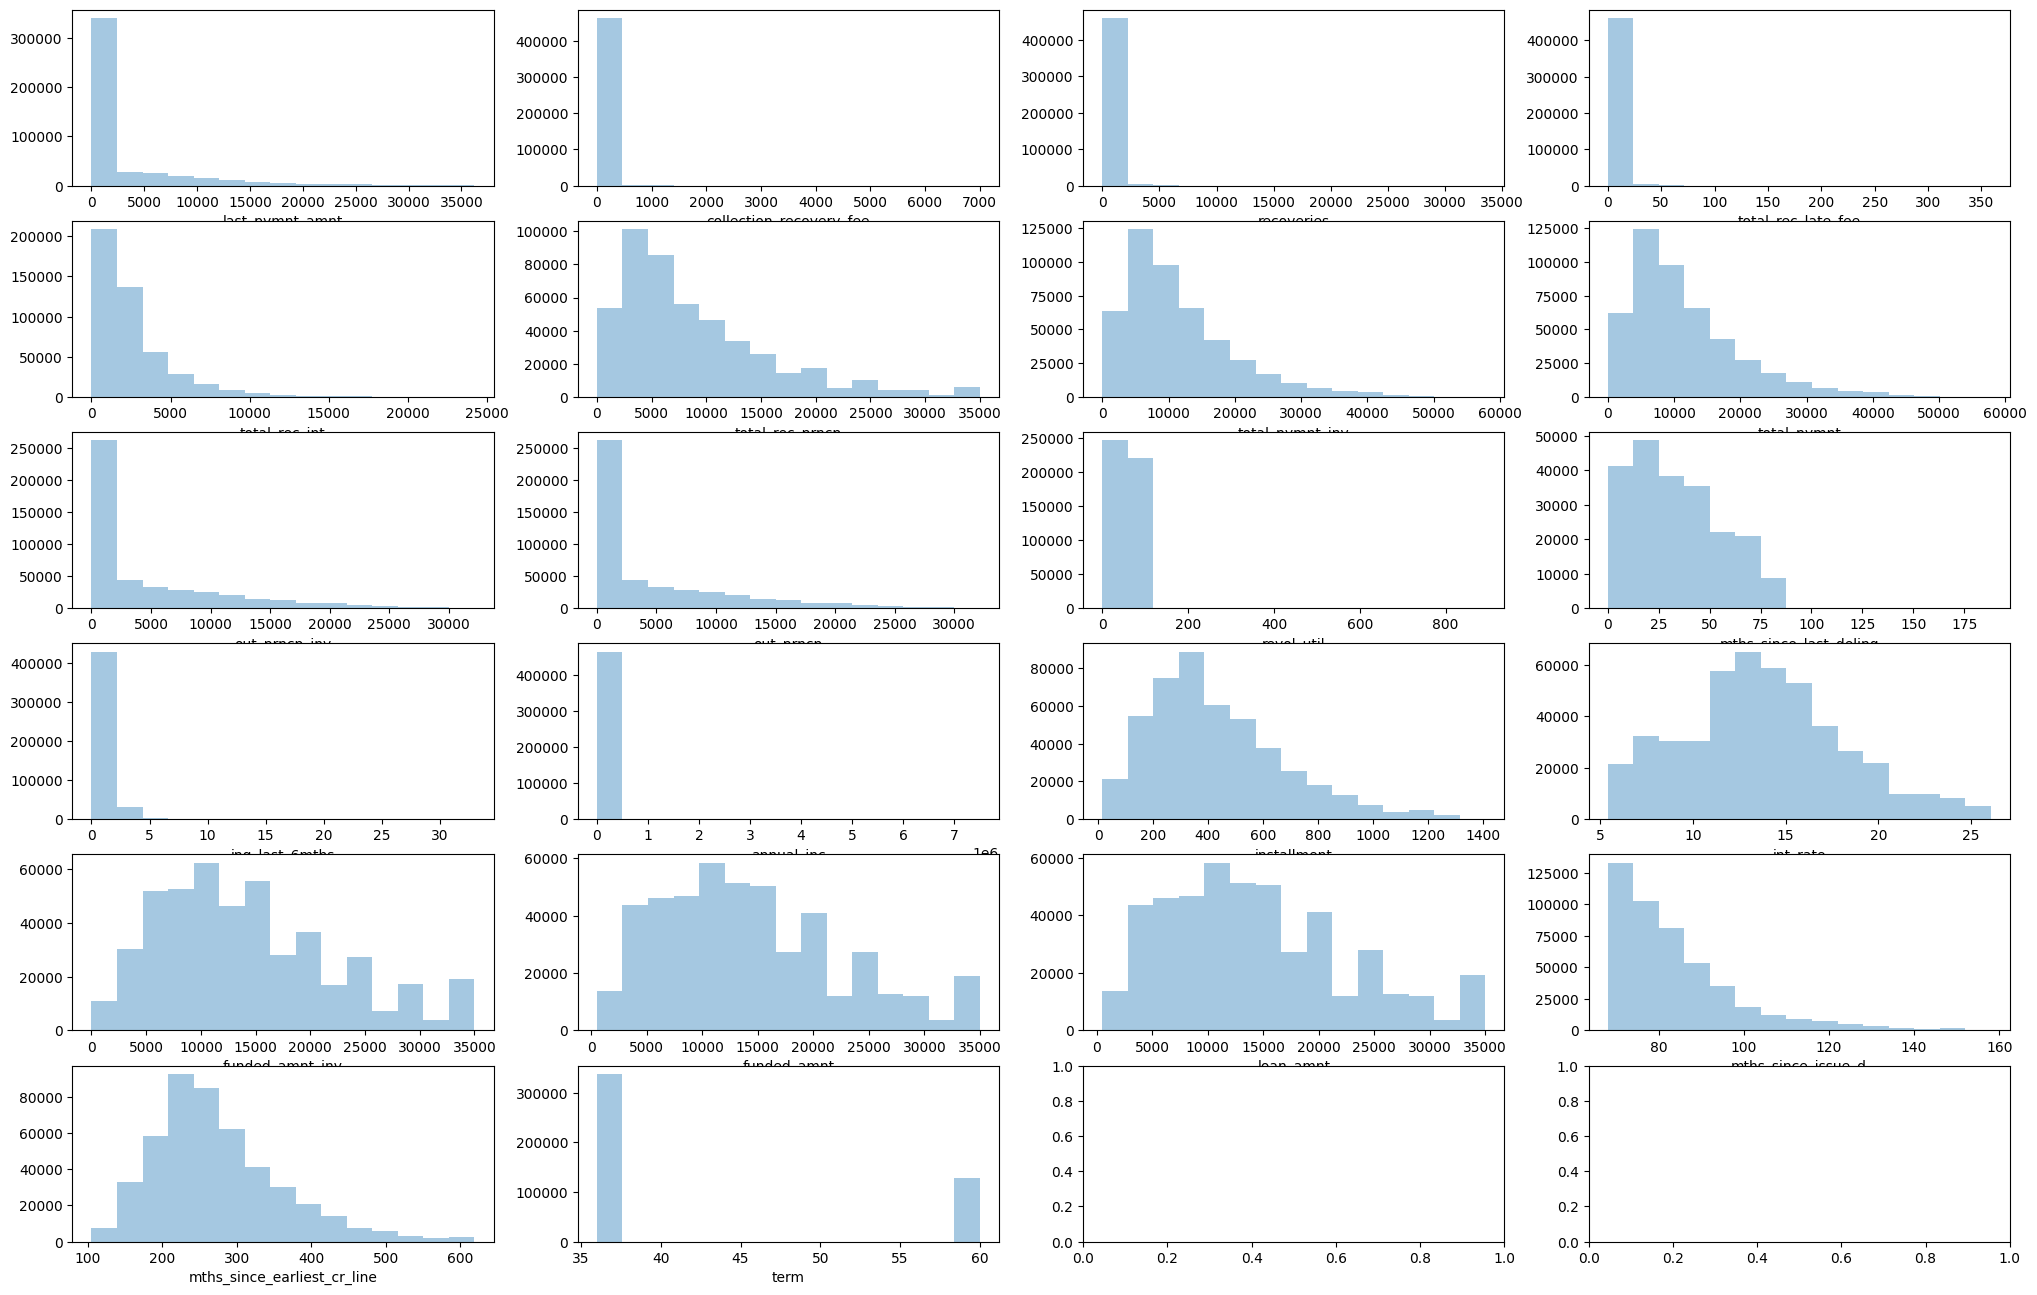

In [26]:
# plot a histogram for each of the features above

nrows = 6
ncols = 4

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 16))

r = 0
c = 0

for i in df_loan_numerical:
  sns.distplot(df_loan_numerical[i], bins=15,kde=False, ax=ax[r][c])
  if c == ncols - 1:
    r += 1
    c = 0
  else:
    c += 1

plt.show()

Hampir semua kolom memiliki terdistribusi right skewed atau skewness bernilai positif.Dimana berarti distribusi data sebagian besar bernilai rendah.

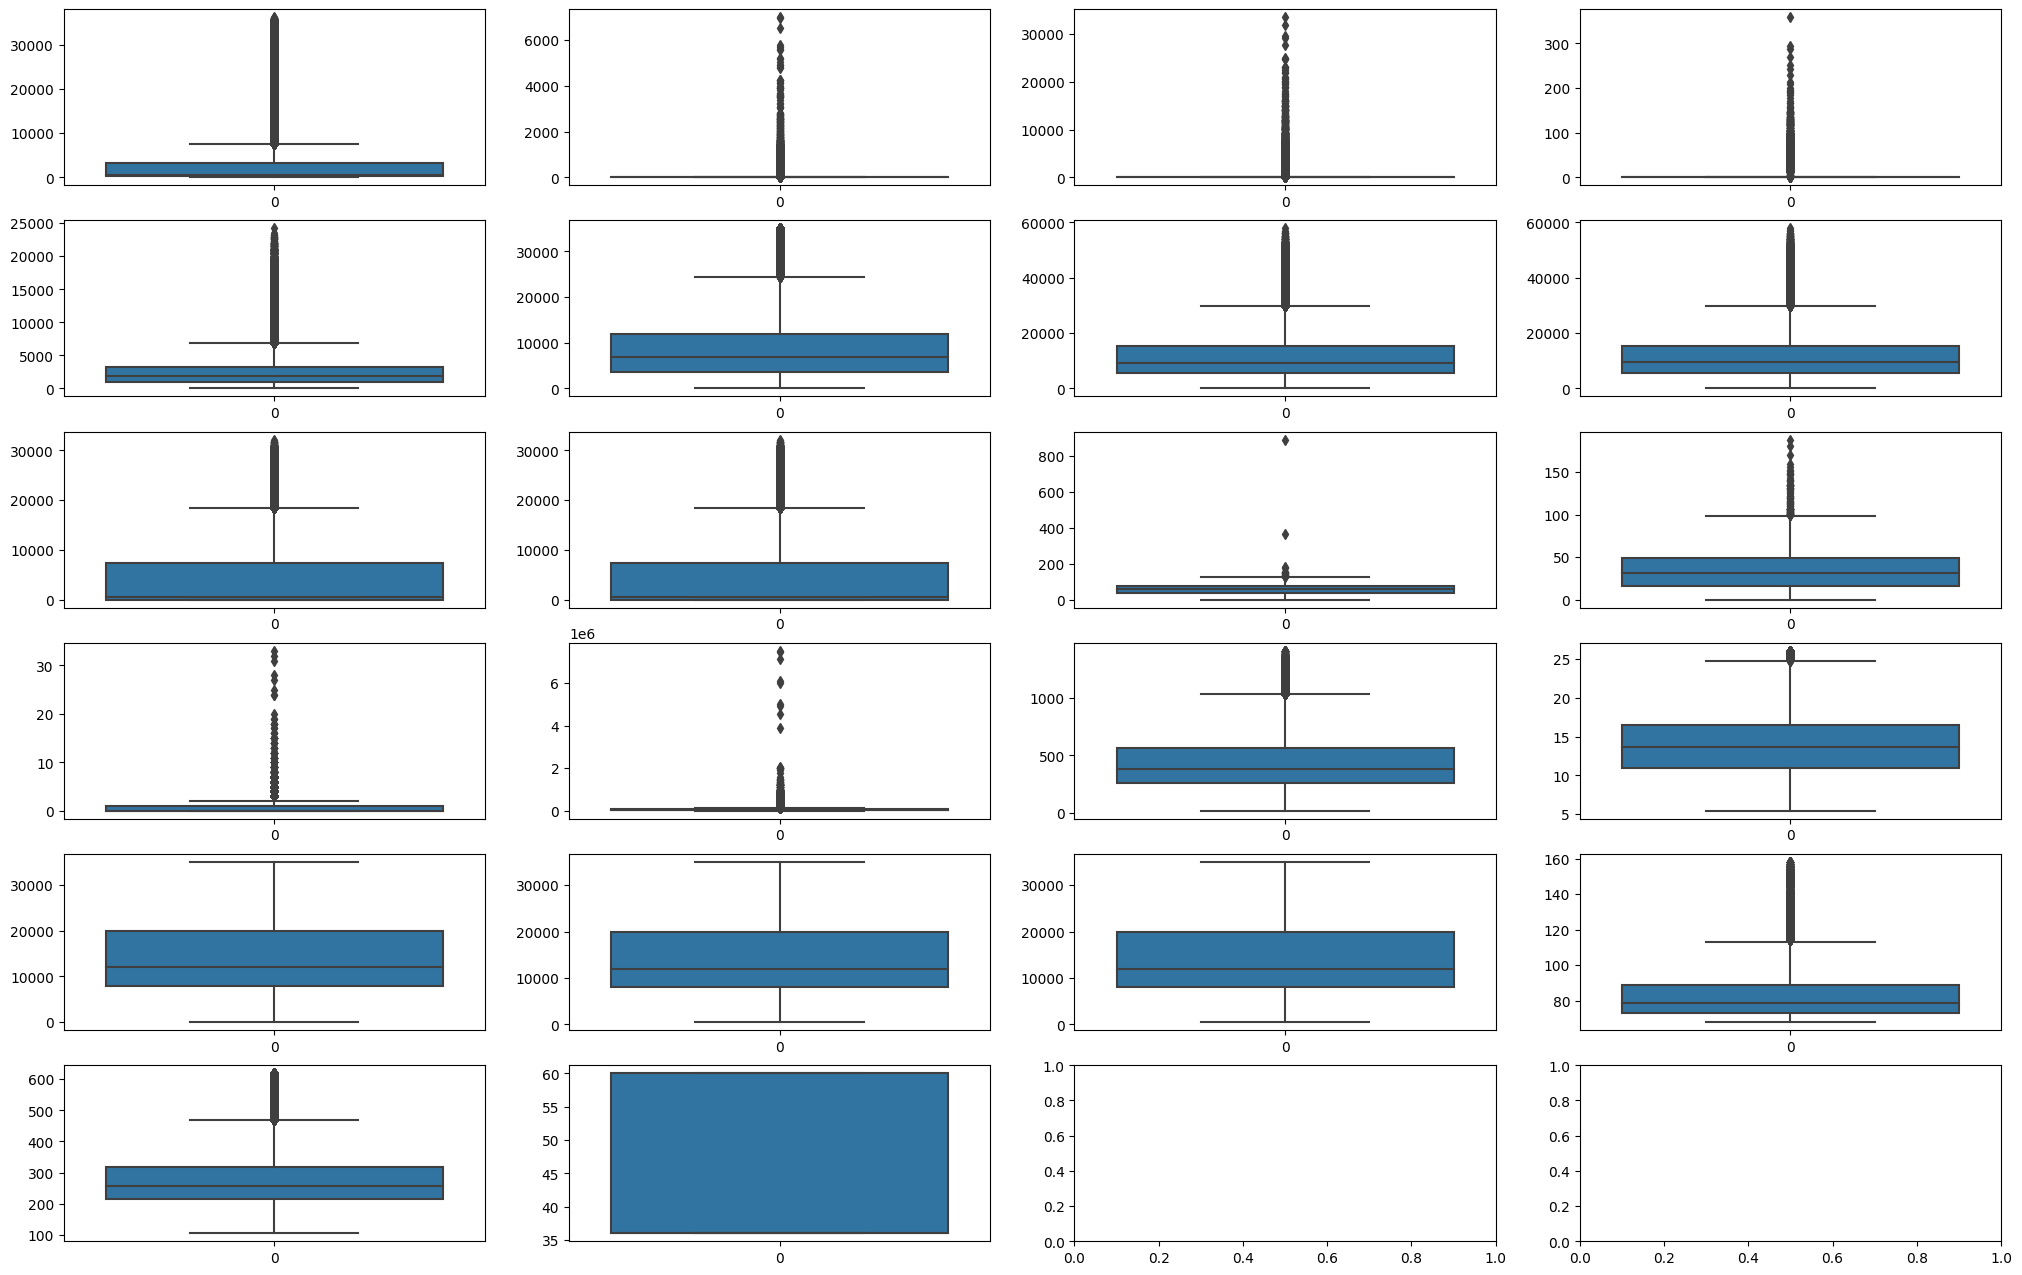

In [68]:
nrows = 6
ncols = 4

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 16))

r = 0
c = 0

for i in df_loan_numerical:
  sns.boxplot(df_loan_numerical[i], ax=ax[r][c])
  if c == ncols - 1:
    r += 1
    c = 0
  else:
    c += 1

plt.show()

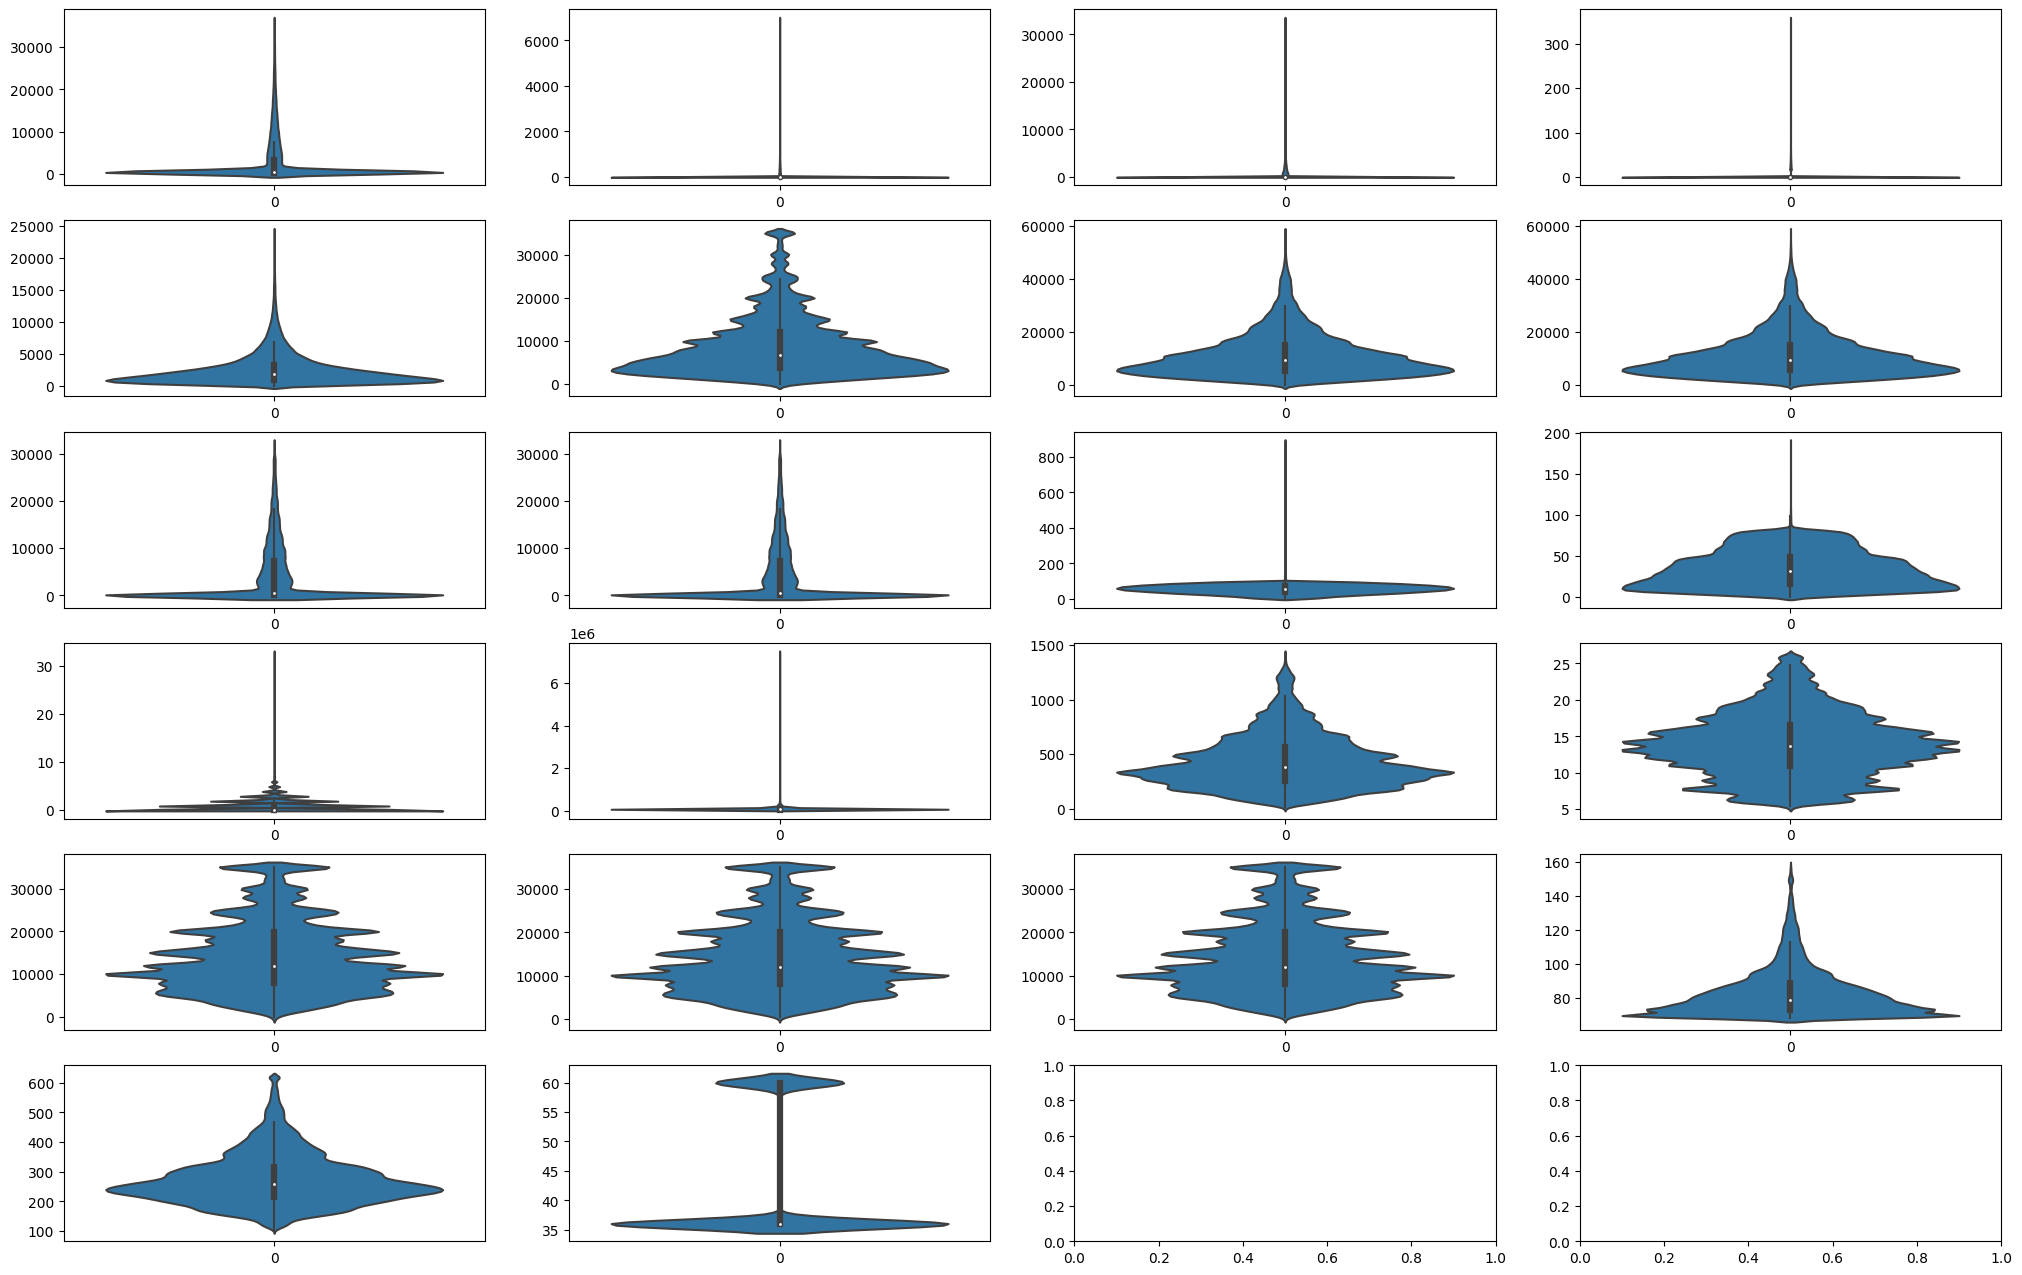

In [65]:
# plot a histogram for each of the features above

nrows = 6
ncols = 4

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 16))

r = 0
c = 0

for i in df_loan_numerical:
  sns.violinplot(df_loan_numerical[i], bins=15,kde=False, ax=ax[r][c])
  if c == ncols - 1:
    r += 1
    c = 0
  else:
    c += 1

plt.show()

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
#from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

# set the aesthetic style of the plots
sns.set_style()

# filter warning messages
import warnings
warnings.filterwarnings('ignore')

In [28]:

df_loan_num = df_loan_data.select_dtypes(exclude='object').columns
df_loan_cat = df_loan_data.select_dtypes(include='object').columns

# fill missing values for numerical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_loan_data.loc[:, df_loan_num])
df_loan_data.loc[:, df_loan_num] = imputer.transform(df_loan_data.loc[:, df_loan_num])

# fill missing values for categorical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_loan_data.loc[:, df_loan_cat])
df_loan_data.loc[:, df_loan_cat] = imputer.transform(df_loan_data.loc[:, df_loan_cat])

In [29]:
df_loan_data.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
purpose                        0
inq_last_6mths                 0
mths_since_last_delinq         0
revol_util                     0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
mths_since_issue_d             0
mths_since_earliest_cr_line    0
dtype: int64

###Identify the Target Variable

In [29]:
# explore the unique values in grade column
df_loan_data['grade'].value_counts()

B    0.293659
C    0.268705
D    0.164895
A    0.160561
E    0.076685
F    0.028371
G    0.007124
Name: grade, dtype: float64

In [30]:
# explore the unique values in home_ownership column
df_loan_data['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

In [31]:
# explore the unique values in initial_list_status column
df_loan_data['initial_list_status'].value_counts(normalize = True)

f    0.649828
w    0.350172
Name: initial_list_status, dtype: float64

In [30]:
# create a new column based on the grade column that will be our target variable
# identify good as 1 , bad as 0
df_loan_data['good_bad'] = np.where(df_loan_data.loc[:, 'grade'].isin(['E', 'F', 'G']), 0, 1)
# Drop the original 'loan_status' column
df_loan_data.drop(columns = ['grade'], inplace = True)

In [33]:
df_loan_data['good_bad'].value_counts()

1    413977
0     52308
Name: good_bad, dtype: int64

In [34]:
df_loan_data['good_bad']

0         1
1         1
2         1
3         1
4         1
         ..
466280    1
466281    1
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

In [31]:
df_loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,mths_since_issue_d,mths_since_earliest_cr_line,good_bad
0,5000.0,5000.0,4975.0,36.0,10.65,162.87,B2,RENT,24000.0,Verified,...,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,104.0,427.0,1
1,2500.0,2500.0,2500.0,60.0,15.27,59.83,C4,RENT,30000.0,Source Verified,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,104.0,256.0,1
2,2400.0,2400.0,2400.0,36.0,15.96,84.33,C5,RENT,12252.0,Not Verified,...,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,104.0,225.0,1
3,10000.0,10000.0,10000.0,36.0,13.49,339.31,C1,RENT,49200.0,Source Verified,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,104.0,294.0,1
4,3000.0,3000.0,3000.0,60.0,12.69,67.79,B5,RENT,80000.0,Source Verified,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,104.0,295.0,1


In [32]:
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  float64
 1   funded_amnt                  466285 non-null  float64
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  float64
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   sub_grade                    466285 non-null  object 
 7   home_ownership               466285 non-null  object 
 8   annual_inc                   466285 non-null  float64
 9   verification_status          466285 non-null  object 
 10  pymnt_plan                   466285 non-null  object 
 11  purpose                      466285 non-null  object 
 12  inq_last_6mths               466285 non-null  float64
 13 

<Axes: ylabel='count'>

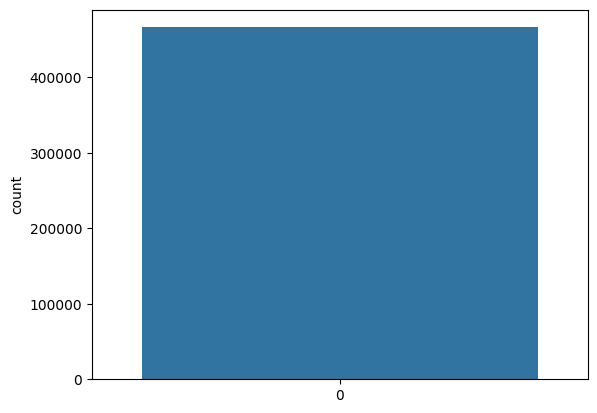

In [37]:
sns.countplot(df_loan_data['good_bad'])

Text(0.5, 1.0, 'sub_grade Distribution')

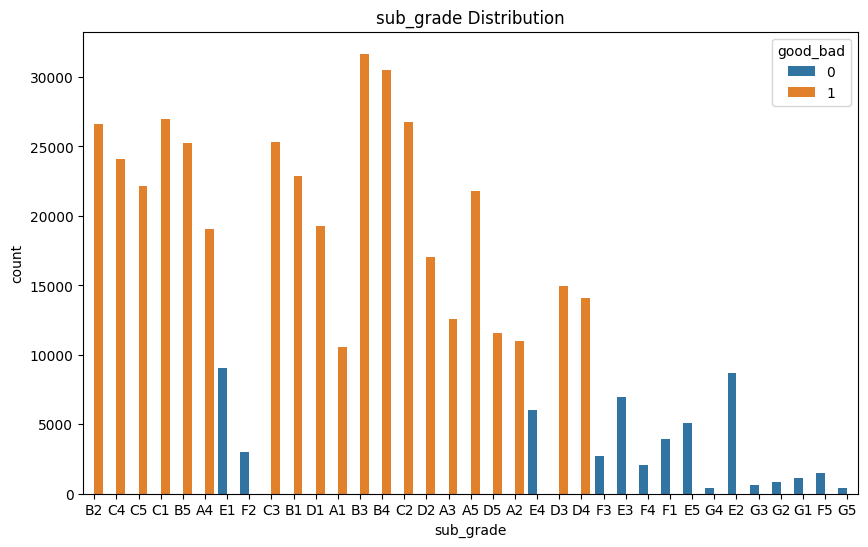

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_loan_data["sub_grade"], hue=df_loan_data["good_bad"])
plt.title("sub_grade Distribution")

Text(0.5, 1.0, 'home_ownership Distribution')

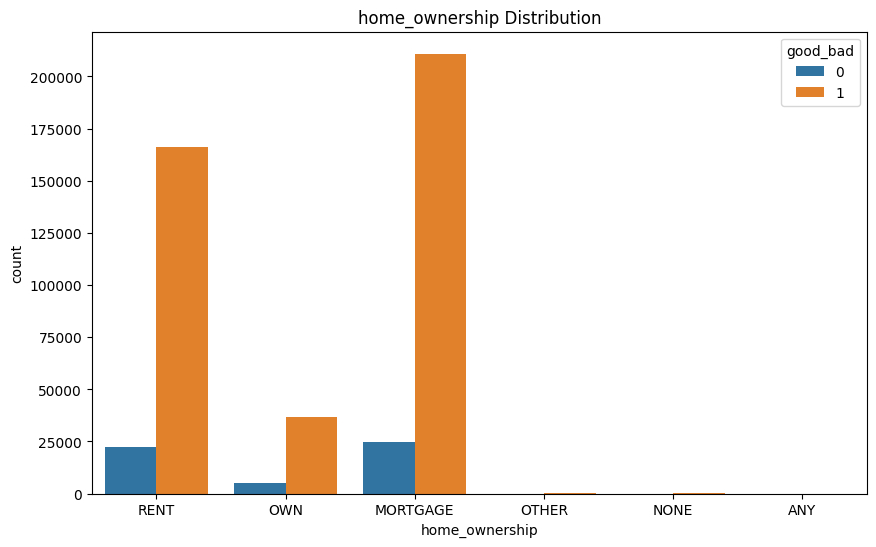

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_loan_data["home_ownership"], hue=df_loan_data["good_bad"])
plt.title("home_ownership Distribution")

Text(0.5, 1.0, 'verification_status Distribution')

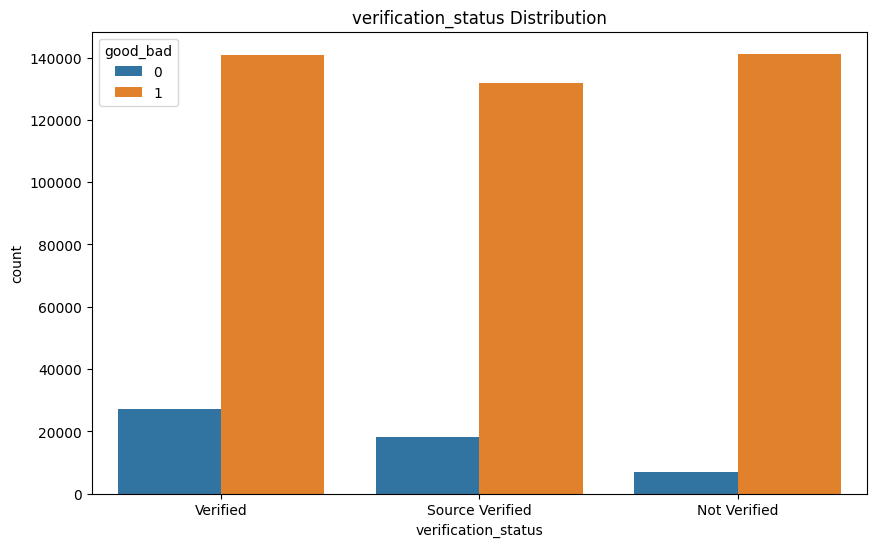

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_loan_data["verification_status"], hue=df_loan_data["good_bad"])
plt.title("verification_status Distribution")

Text(0.5, 1.0, 'initial_list_status Distribution')

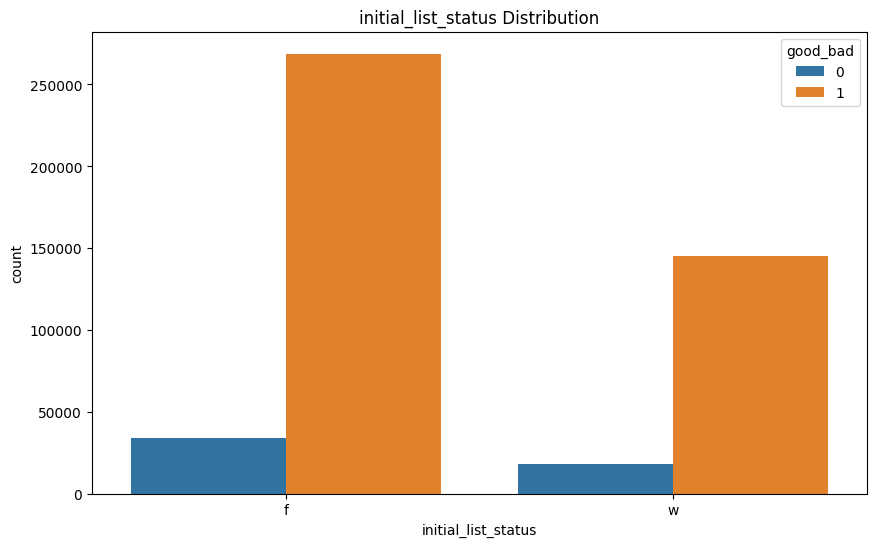

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_loan_data["initial_list_status"], hue=df_loan_data["good_bad"])
plt.title("initial_list_status Distribution")

Text(0.5, 1.0, 'pymnt_plan Distribution')

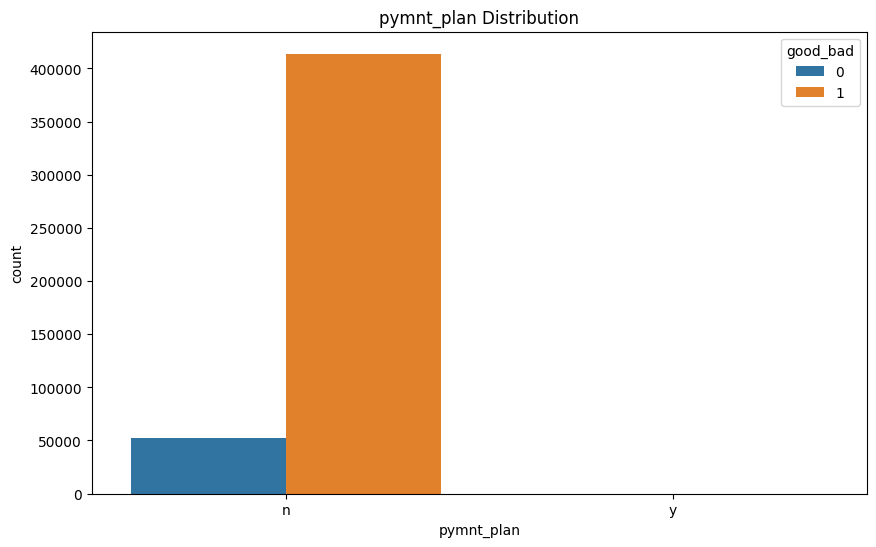

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_loan_data["pymnt_plan"], hue=df_loan_data["good_bad"])
plt.title("pymnt_plan Distribution")

Text(0.5, 1.0, 'purpose Distribution')

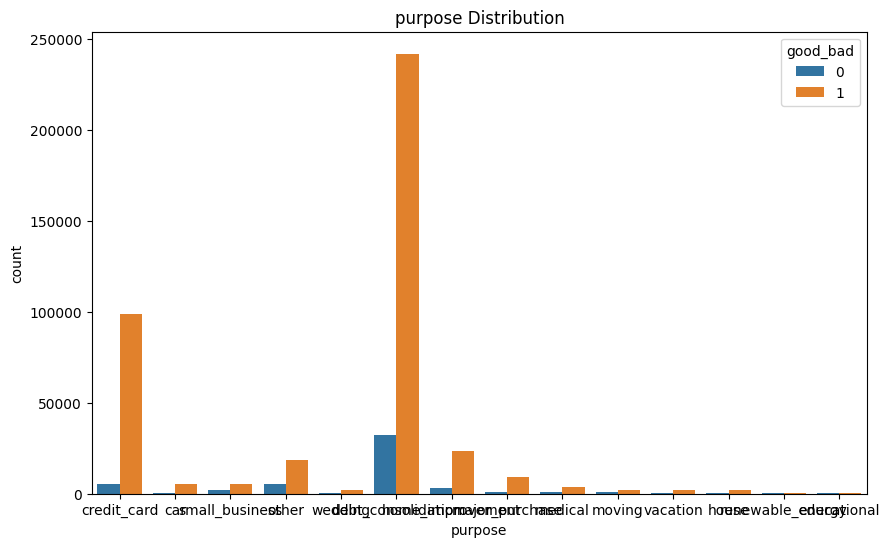

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_loan_data["purpose"], hue=df_loan_data["good_bad"])
plt.title("purpose Distribution")

###Feature Engineering

In [33]:
bin_var = df_loan_data.nunique()[df_loan_data.nunique() == 2].keys().tolist()
num_var = [col for col in df_loan_data.select_dtypes(['int', 'float']).columns.tolist() if col not in bin_var]
cat_var = [col for col in df_loan_data.select_dtypes(['object']).columns.tolist() if col not in bin_var]

df_loan_encoded = df_loan_data.copy()

# label encoding for the binary variables
le = LabelEncoder()
for col in bin_var:
  df_loan_encoded[col] = le.fit_transform(df_loan_encoded[col])


In [34]:
# encoding with get_dummies for the categorical variables
df_loan_encoded = pd.get_dummies(df_loan_encoded, columns=cat_var)

df_loan_encoded.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,pymnt_plan,inq_last_6mths,mths_since_last_delinq,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,0,10.65,162.87,24000.0,0,1.0,31.0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,1,15.27,59.83,30000.0,0,5.0,31.0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,0,15.96,84.33,12252.0,0,2.0,31.0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,10000.0,0,13.49,339.31,49200.0,0,1.0,35.0,...,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,3000.0,1,12.69,67.79,80000.0,0,0.0,38.0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
# create independent and dependent features
X = df_loan_encoded.drop('good_bad', axis = 1)
y = df_loan_encoded['good_bad']


###Scaling numerical data

In [36]:
# standardize numerical variables
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

###Split data

In [37]:
# split data into 80/20 while keeping the distribution of bad loans in test set same as that in the pre-split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

X_train, X_test = X_train.copy(), X_test.copy()

In [71]:
X_train

array([[-1.00398161, -1.00240034, -0.99119778, ..., -0.12361135,
        -0.07277085, -0.07052164],
       [ 0.8931408 ,  0.89757817,  0.90334963, ..., -0.12361135,
        -0.07277085, -0.07052164],
       [ 1.28824897,  1.29328117,  1.29792151, ..., -0.12361135,
        -0.07277085, -0.07052164],
       ...,
       [-0.16852389, -0.16568485, -0.15687404, ..., -0.12361135,
        -0.07277085, -0.07052164],
       [ 2.01211126,  2.01823322,  2.02080128, ..., -0.12361135,
        -0.07277085, -0.07052164],
       [-1.00398161, -1.00240034, -0.99119778, ..., -0.12361135,
        -0.07277085, -0.07052164]])

In [45]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE= SMOTE()

# fit and apply the transform
X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({1: 331182, 0: 41846})
After oversampling:  Counter({1: 331182, 0: 331182})


##Building Model

###Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [39]:
# Predicting the model
pred_logit= logit.predict(X_test)

In [40]:
print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy of logit model is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10462
           1       1.00      1.00      1.00     82795

    accuracy                           1.00     93257
   macro avg       1.00      1.00      1.00     93257
weighted avg       1.00      1.00      1.00     93257



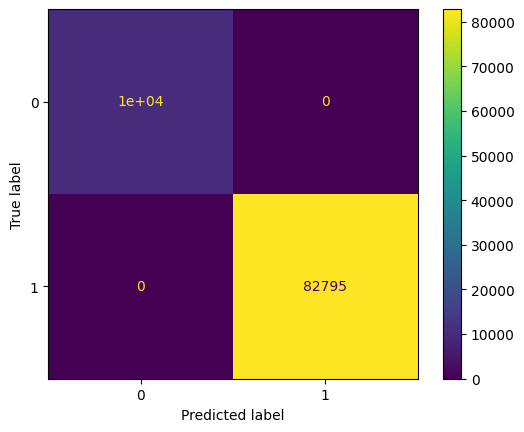

In [56]:
# Plot confusion metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_logit, labels=logit.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logit.classes_)
plt.cm.Blues
disp.plot()
plt.show()

###Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
# Predicting the model
pred_rf= rf.predict(X_test)

In [60]:
print("The accuracy of rf model is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test,pred_rf ))

The accuracy of rf model is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10462
           1       1.00      1.00      1.00     82795

    accuracy                           1.00     93257
   macro avg       1.00      1.00      1.00     93257
weighted avg       1.00      1.00      1.00     93257



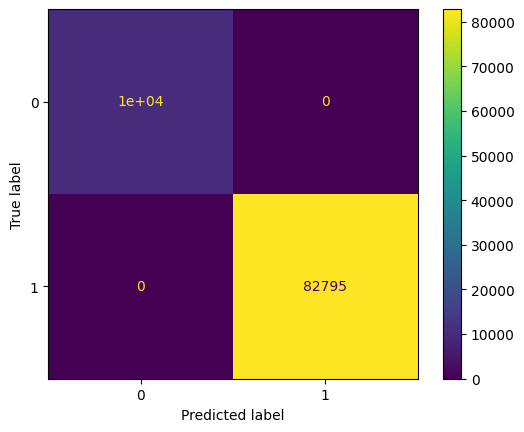

In [61]:
# Plot confusion metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
plt.cm.Blues
disp.plot()
plt.show()

###XGBoost Classifier

In [62]:
# final XGBoost model
xgb = XGBClassifier(max_depth=3, learning_rate=0.0001, n_estimators=50, gamma=1, min_child_weight=6)
xgb.fit(X_train, y_train)

# prediction
pred_xgb = xgb.predict(X_test)

# classification report
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     10462
           1       0.99      1.00      1.00     82795

    accuracy                           0.99     93257
   macro avg       1.00      0.97      0.99     93257
weighted avg       0.99      0.99      0.99     93257



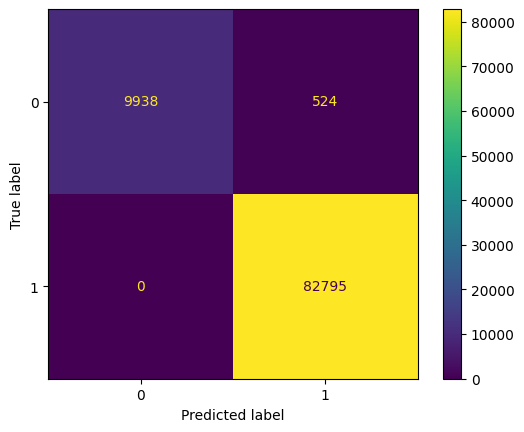

In [64]:
# Plot confusion metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=xgb.classes_)
plt.cm.Blues
disp.plot()
plt.show()

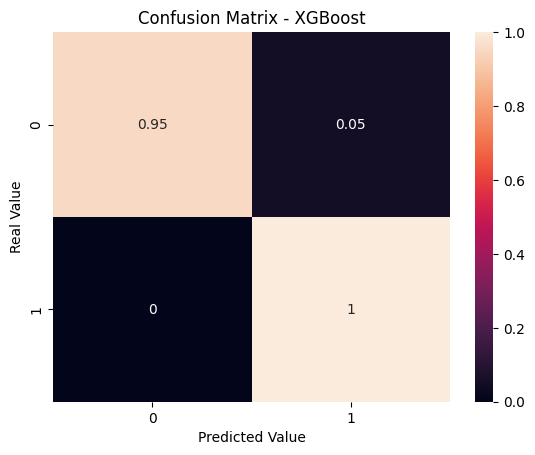

In [63]:
# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, pred_xgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - XGBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()